In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('CVD_cleaned.csv')

In [4]:
pd.read_csv('CVD_cleaned.csv').head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
df.tail()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0
308853,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,45-49,160.0,81.19,31.71,No,1.0,5.0,12.0,1.0


In [6]:
df.tail(50)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
308804,Good,Within the past year,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,35-39,157.0,58.51,23.59,Yes,0.0,2.0,2.0,1.0
308805,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,70-74,163.0,63.50,24.03,No,0.0,60.0,30.0,0.0
308806,Fair,Within the past year,Yes,No,No,No,Yes,Yes,No,Female,40-44,157.0,97.98,39.51,No,14.0,15.0,7.0,5.0
308807,Fair,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,173.0,125.65,42.12,No,3.0,30.0,16.0,3.0
308808,Good,Within the past year,No,No,Yes,No,No,No,No,Female,70-74,157.0,81.65,32.92,No,0.0,12.0,30.0,0.0
308809,Good,Within the past year,No,Yes,No,Yes,No,Yes,No,Male,75-79,180.0,81.65,25.10,No,0.0,60.0,0.0,0.0
308810,Very Good,Within the past 2 years,Yes,No,No,No,No,No,No,Male,40-44,178.0,88.45,27.98,Yes,0.0,15.0,20.0,8.0
308811,Good,Within the past year,No,No,No,Yes,No,No,Yes,Male,65-69,180.0,127.01,39.05,No,0.0,8.0,12.0,1.0
308812,Good,Within the past year,Yes,No,No,No,No,No,No,Male,60-64,168.0,81.65,29.05,No,8.0,30.0,30.0,0.0
308813,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,75-79,160.0,61.23,23.91,No,4.0,30.0,30.0,8.0


In [7]:
df[pd.crosstab(['Age_Category'], ['Height_(cm)'])].head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.rename(columns = {'General_Health': "Condition"})

In [9]:
df

,Condition,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [10]:
df['Height_(cm)'].mean()

170.61524862880196

In [11]:
df = df.rename(columns = {'Age_Category': 'Age', 'Height_(cm)': 'Height', 'Weight_(kg)': 'Weight', 'Smoking_History': 'Smoking',
                        'Alcohol_Consumption': 'Alcohol', 'Alcohol_Consumption': 'Alcohol', 'Green_Vegetables_Consumption': 'Vegetables_Consumption',})

In [12]:
df

,Condition,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age,Height,Weight,BMI,Smoking,Alcohol,Fruit_Consumption,Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [13]:
df['Weight'].mean()

83.58865454227563

array([[<Axes: title={'center': '18-24'}>,
        <Axes: title={'center': '25-29'}>,
        <Axes: title={'center': '30-34'}>,
        <Axes: title={'center': '35-39'}>],
       [<Axes: title={'center': '40-44'}>,
        <Axes: title={'center': '45-49'}>,
        <Axes: title={'center': '50-54'}>,
        <Axes: title={'center': '55-59'}>],
       [<Axes: title={'center': '60-64'}>,
        <Axes: title={'center': '65-69'}>,
        <Axes: title={'center': '70-74'}>,
        <Axes: title={'center': '75-79'}>],
       [<Axes: title={'center': '80+'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

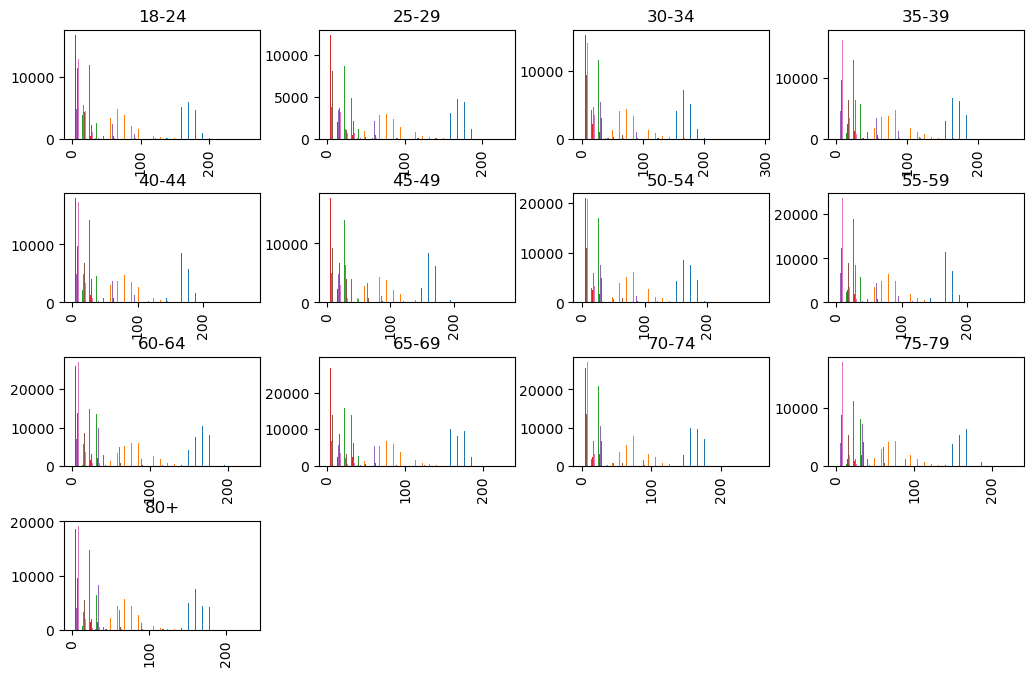

In [14]:
df.hist(by='Age', figsize=[12, 8], bins=25)

In [29]:
df.groupby("Exercise", group_keys=False).apply(lambda x: x).head(3)

,Condition,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age,Height,Weight,BMI,Smoking,Alcohol,Fruit_Consumption,Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0


In [45]:


# Filter the DataFrame for weight above 80 and depressed individuals
filtered_df = df[(df['Weight'] > 80) & (df['Depression'] == True)]

# Count the number of people who meet the criteria
count = len(filtered_df)

# Print the count
print("Number of people with weight above 80 and are depressed:", count)

Number of people with weight above 80 and are depressed: 0


In [70]:
ff = pd.DataFrame(df['Weight'])
kk = ff[(ff['Weight']> 100)]
print(len(kk))


56022
